In [214]:
from sympy import *
from sympy.stats import Triangular, density
from sympy.plotting import plot
import matplotlib.pyplot as plt
import numpy as np

In [215]:
x = Symbol('x', real=True)

In [216]:
h1 = Symbol('h1', real=True)
T1 = Triangular('x', -h1, +h1, 0)

h2 = Symbol('h2', real=True)
T2 = Triangular('x', -h2, +h2, 0)

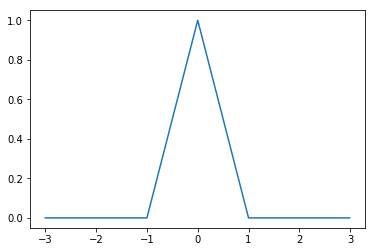

In [217]:
T1_pdf = density(T1)(x)
T2_pdf = density(T2)(x)
T1_pdf = T1_pdf.subs(h2, 1)

xrange = np.arange(-3, 3, 0.01)
f = np.vectorize(lambdify(x, y_pdf))
yrange = f(xrange)
plt.plot(xrange, yrange)

In [239]:
def convolve(f, g, x):
    tau = Symbol('tau', real=True)
    conv = integrate(f.subs(x, tau) * g.subs(x, x - tau), (tau, -1000, 1000))
    return(conv)

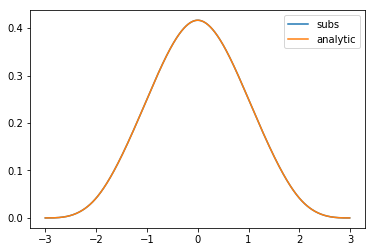

In [243]:
substituted_conv = convolve(T1_pdf.subs(h1, 1), T2_pdf.subs(h2,2), x)
substituted_func = np.vectorize(lambdify(x, substituted_conv))

analytic_conv = convolve(T1_pdf, T2_pdf, x)
analytic_conv = analytic_conv.subs(h1, 1).subs(h2, 2)
analytic_func = np.vectorize(lambdify(x, analytic_conv))

xr = np.arange(-3, 3, 0.01)
yr1 = substituted_func(xr)
plt.plot(xr, yr1, label='subs')
yr2 = analytic_func(xr)
plt.plot(xr, yr2, label='analytic')
plt.legend()

In [241]:
import scipy.integrate as spintegrate
int1 = spintegrate.quad(substituted_func, -np.infty, np.infty)
int2 = spintegrate.quad(analytic_func, -np.infty, np.infty)

print(int1, '  ', int2)

(1.0000000006074887, 8.76166403913698e-09)    (1.0000000006090208, 8.766027345996633e-09)


In [193]:
from sympy import refine, Q
pred = Q.is_true(x<-2)
simplify(refine(k, pred))

(-x + 1)*Min(Max(-1, x), Max(0, x - 2))**2/8 + (-x + 1)*Min(Max(-1, x - 2), Max(0, x), Max(0, x - 2))**2/8 + (-x + 3)*Max(-1, Min(x, Max(0, x - 2)))**2/8 + (x - 3)*Max(-1, x - 2)**2/8 + (x - 2)*Max(-1, x - 2)/4 - (x - 2)*Max(-1, Min(x, Max(0, x - 2)))/4 + (x - 2)*Min(Max(-1, x), Max(0, x - 2))/4 - (x - 2)*Min(Max(-1, x), Max(0, x - 2, Min(1, x)))/4 + (x - 2)*Min(Max(-1, x - 2), Max(0, x), Max(0, x - 2))/4 - (x - 2)*Min(Max(-1, x - 2), Max(0, x), Max(0, x - 2, Min(1, x)))/4 + (x - 1)*Min(Max(-1, x), Max(0, x - 2, Min(1, x)))**2/8 + (x - 1)*Min(Max(-1, x - 2), Max(0, x), Max(0, x - 2, Min(1, x)))**2/8 - (x + 1)*Max(-1, x)**2/8 + (x + 1)*Max(-1, x, Min(0, x + 2))**2/8 - (x + 2)*Max(-1, x)/4 - (x + 2)*Max(0, x)/4 + (x + 2)*Max(-1, x, Min(0, x + 2))/4 + (x + 2)*Max(0, x, Min(1, x + 2))/4 + (x + 2)*Min(Max(-1, x - 2), Max(0, x, Min(1, x + 2)))/4 - (x + 2)*Min(Max(-1, x - 2), Max(0, x))/4 + (x + 3)*Max(0, x)**2/8 - (x + 3)*Max(0, x, Min(1, x + 2))**2/8 - (x + 3)*Min(Max(-1, x - 2), Max(0, x, 

In [242]:
analytic_conv

(-x - 3)*Min(1000, Max(-1, Min(Max(-1000, x - 2), Max(0, x, Min(1, x + 2)))))**2/8 - (-x - 3)*Min(1000, Max(-1, Min(Max(-1000, x - 2), Max(0, x))))**2/8 - (-x - 3)*Min(1000, Max(0, x))**2/8 - (-x - 3)*Min(1000, Max(-1, x, Min(0, Max(-1000, x + 2))))**2/8 + (-x - 3)*Min(1000, Max(-1, x, Min(Max(0, Min(1, x + 2)), Max(-1000, x - 2, Min(0, x + 2)))))**2/8 + (-x - 3)*Min(1000, Max(0, x, Min(1, x + 2)))**2/8 + (-x - 3)*Min(1000, Max(-1, x - 2), Max(0, x, Min(1, x + 2)))**2/8 - (-x - 3)*Min(1000, Max(-1, x - 2), Max(0, x))**2/8 - (-x + 2)*Min(1000, Max(-1, x - 2))/4 + (-x + 2)*Min(1000, Max(-1, Min(x, Max(0, x - 2))))/4 - (-x + 2)*Min(1000, Max(-1, Min(Max(-1000, x), Max(0, x - 2))))/4 + (-x + 2)*Min(1000, Max(-1, Min(Max(-1000, x), Max(0, x - 2, Min(1, x)))))/4 - (-x + 2)*Min(1000, Max(-1, Min(Max(-1000, x - 2), Max(0, x), Max(0, x - 2))))/4 + (-x + 2)*Min(1000, Max(-1, Min(Max(-1000, x - 2), Max(0, x), Max(0, x - 2, Min(1, x)))))/4 + (-x + 2)*Min(1000, Max(-1, x, Min(0, x + 2)))/4 - (-x + 